<a href="https://colab.research.google.com/github/User-Galih/capstone-project-bengkod/blob/main/Project_Capstone_Bengkod_14359_Galih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = '/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet.csv'  # Sesuaikan dengan lokasi file di Google Drive
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Tampilkan informasi umum dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [ ]:
# Menampilkan semua nilai unik dari semua kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Kolom: Age
Nilai unik:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
Total nilai unik: 1394
Jumlah data kosong (NaN): 14, jumlah '?' sebagai missing: 8

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: Height
Nilai unik:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
Total nilai unik: 1562
Jumlah data kosong (NaN): 12, jumlah '?' sebagai missing: 10

Kolom: Weight
Nilai unik:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
Total nilai unik: 1518
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 8

Kolom: CALC
Nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Total nilai unik: 5
Jumlah data kosong (NaN): 5, jumlah '?' sebagai missing: 15

Kolom: FAVC
Nilai unik:
['no' 'yes' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 11

Kolom: FCVC
Nilai unik:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979

In [ ]:
# 1. Konversi kolom yang seharusnya numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik, ganti error jadi NaN


In [ ]:
# 2. Tampilkan beberapa baris pertama untuk memastikan konversi tipe data berhasil
print("Beberapa baris pertama dari dataset:")
print(df.head())

Beberapa baris pertama dari dataset:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

 

In [ ]:
# 3. Informasi umum dataset
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF      

In [ ]:
# 4. Deskripsi data
print("\nDeskripsi Statistik Dataset:")
print(df.describe(include='all'))


Deskripsi Statistik Dataset:
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2102  2089.000000  2092.000000       2106  2100   
unique          NaN      3          NaN          NaN          5     3   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000

In [ ]:
# 5. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 6. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 7. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat:
18

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: H

In [ ]:
import numpy as np

# Tangani missing values (termasuk nilai '?')

# Ganti semua nilai '?' menjadi np.nan (agar bisa diproses sebagai missing value)
df.replace('?', np.nan, inplace=True)

# Tentukan kolom numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Isi NaN pada kolom numerik dengan median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Tentukan kolom kategorikal (selain kolom numerik)
categorical_columns = [col for col in df.columns if col not in numerical_columns]

# Isi NaN pada kolom kategorikal dengan modus (most frequent value)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Jumlah data awal:", len(df))
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data setelah duplikat dihapus:", len(df))


Jumlah data awal: 2111
Jumlah data duplikat: 20
Jumlah data setelah duplikat dihapus: 2091


In [ ]:
# Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    # Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Jumlah Data Duplikat:
0

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male']
Total nilai unik: 2
Jumlah data kosong (NaN): 0, jumlah '?' sebagai missing: 0

Kolom: Height
Nilai unik:
[1.62     

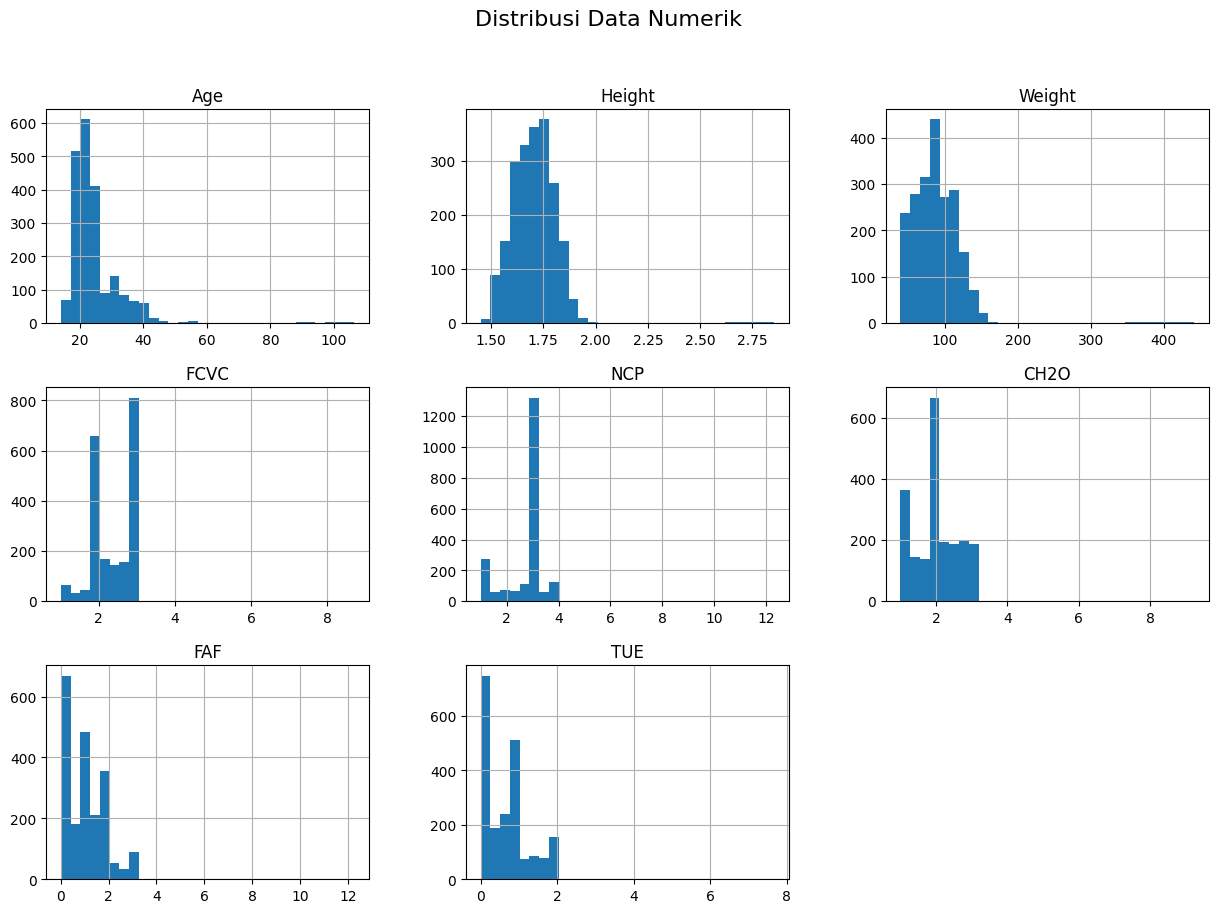

In [ ]:
# 8. Visualisasi distribusi data numerik
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

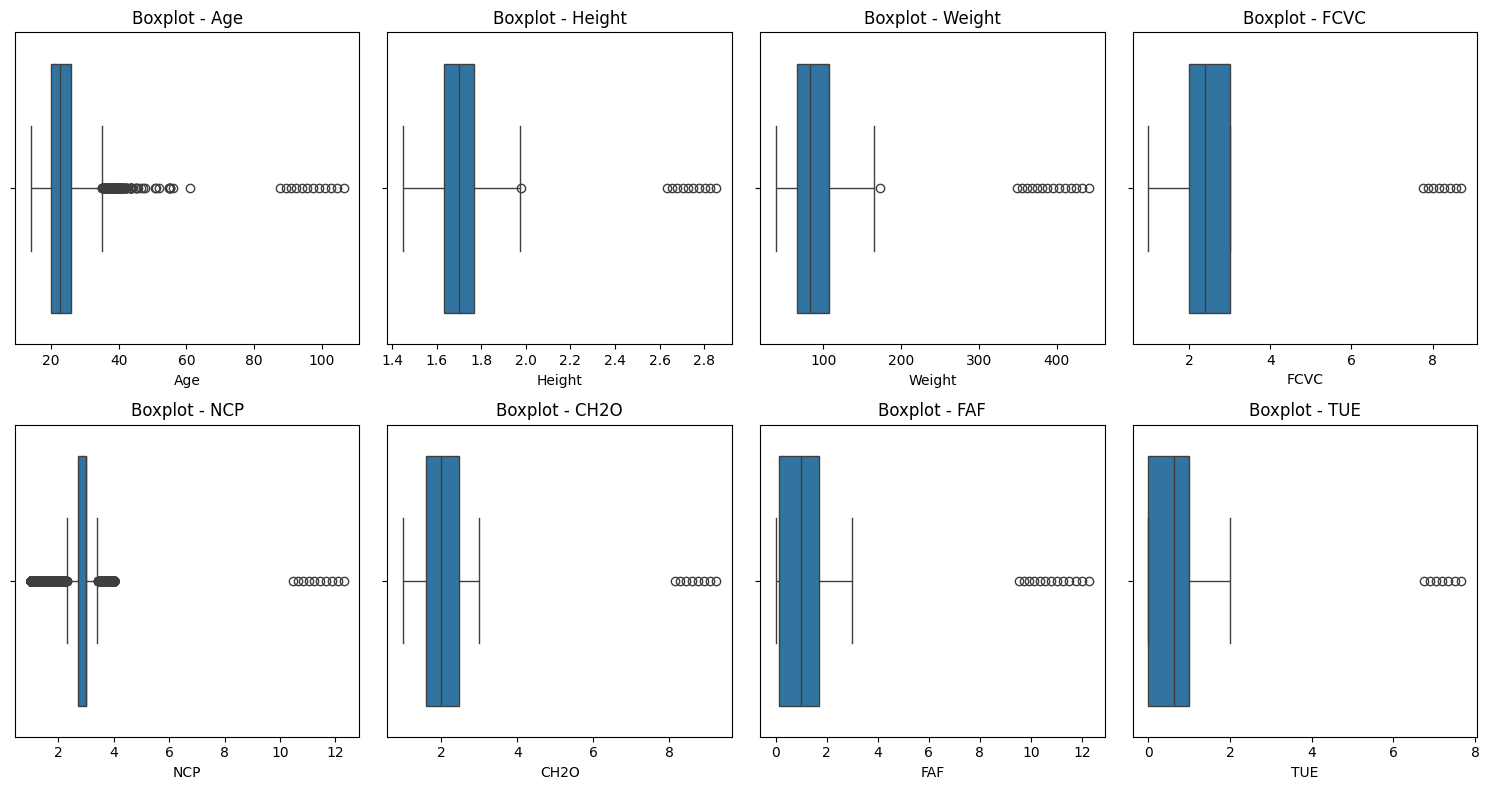

In [ ]:
# 9. Deteksi outlier menggunakan boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Distribusi Kelas Target (NObeyesdad)
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          284
Overweight_Level_I     276
Insufficient_Weight    269
Name: count, dtype: int64


<ipython-input-13-2229455984>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='NObeyesdad', palette='viridis')


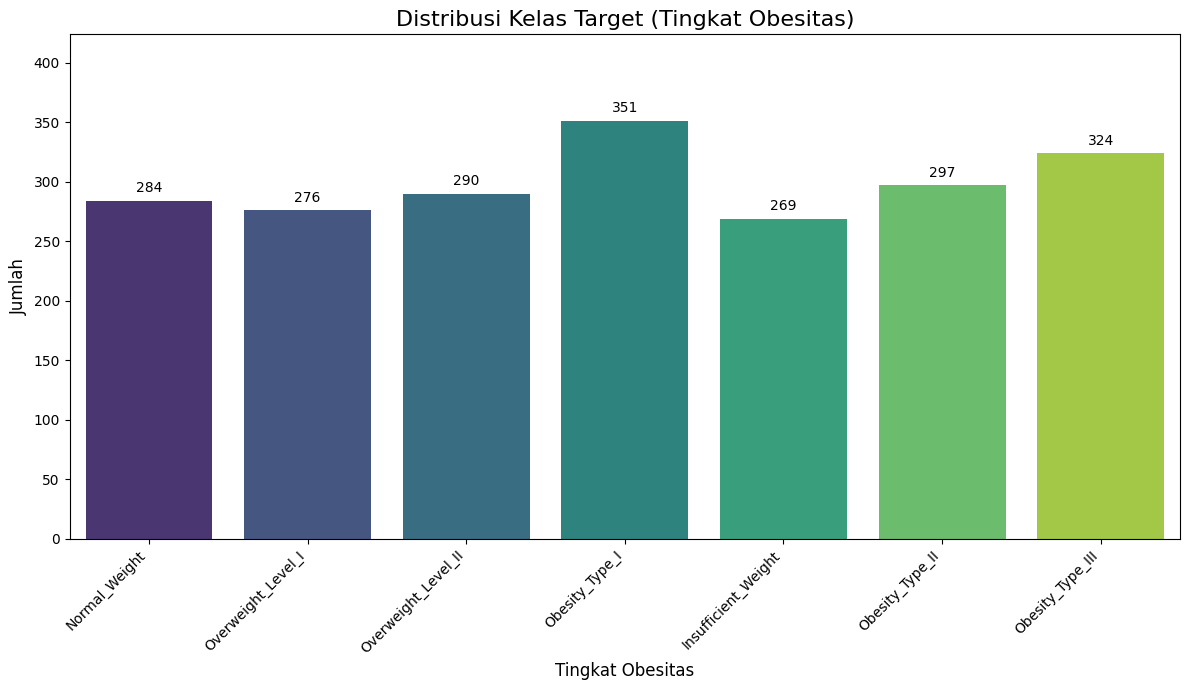

<ipython-input-13-2229455984>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='plasma', ax=ax)
<ipython-input-13-2229455984>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='plasma', ax=ax)
<ipython-input-13-2229455984>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='plasma', ax=ax)
<ipython-input-13-2229455984>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

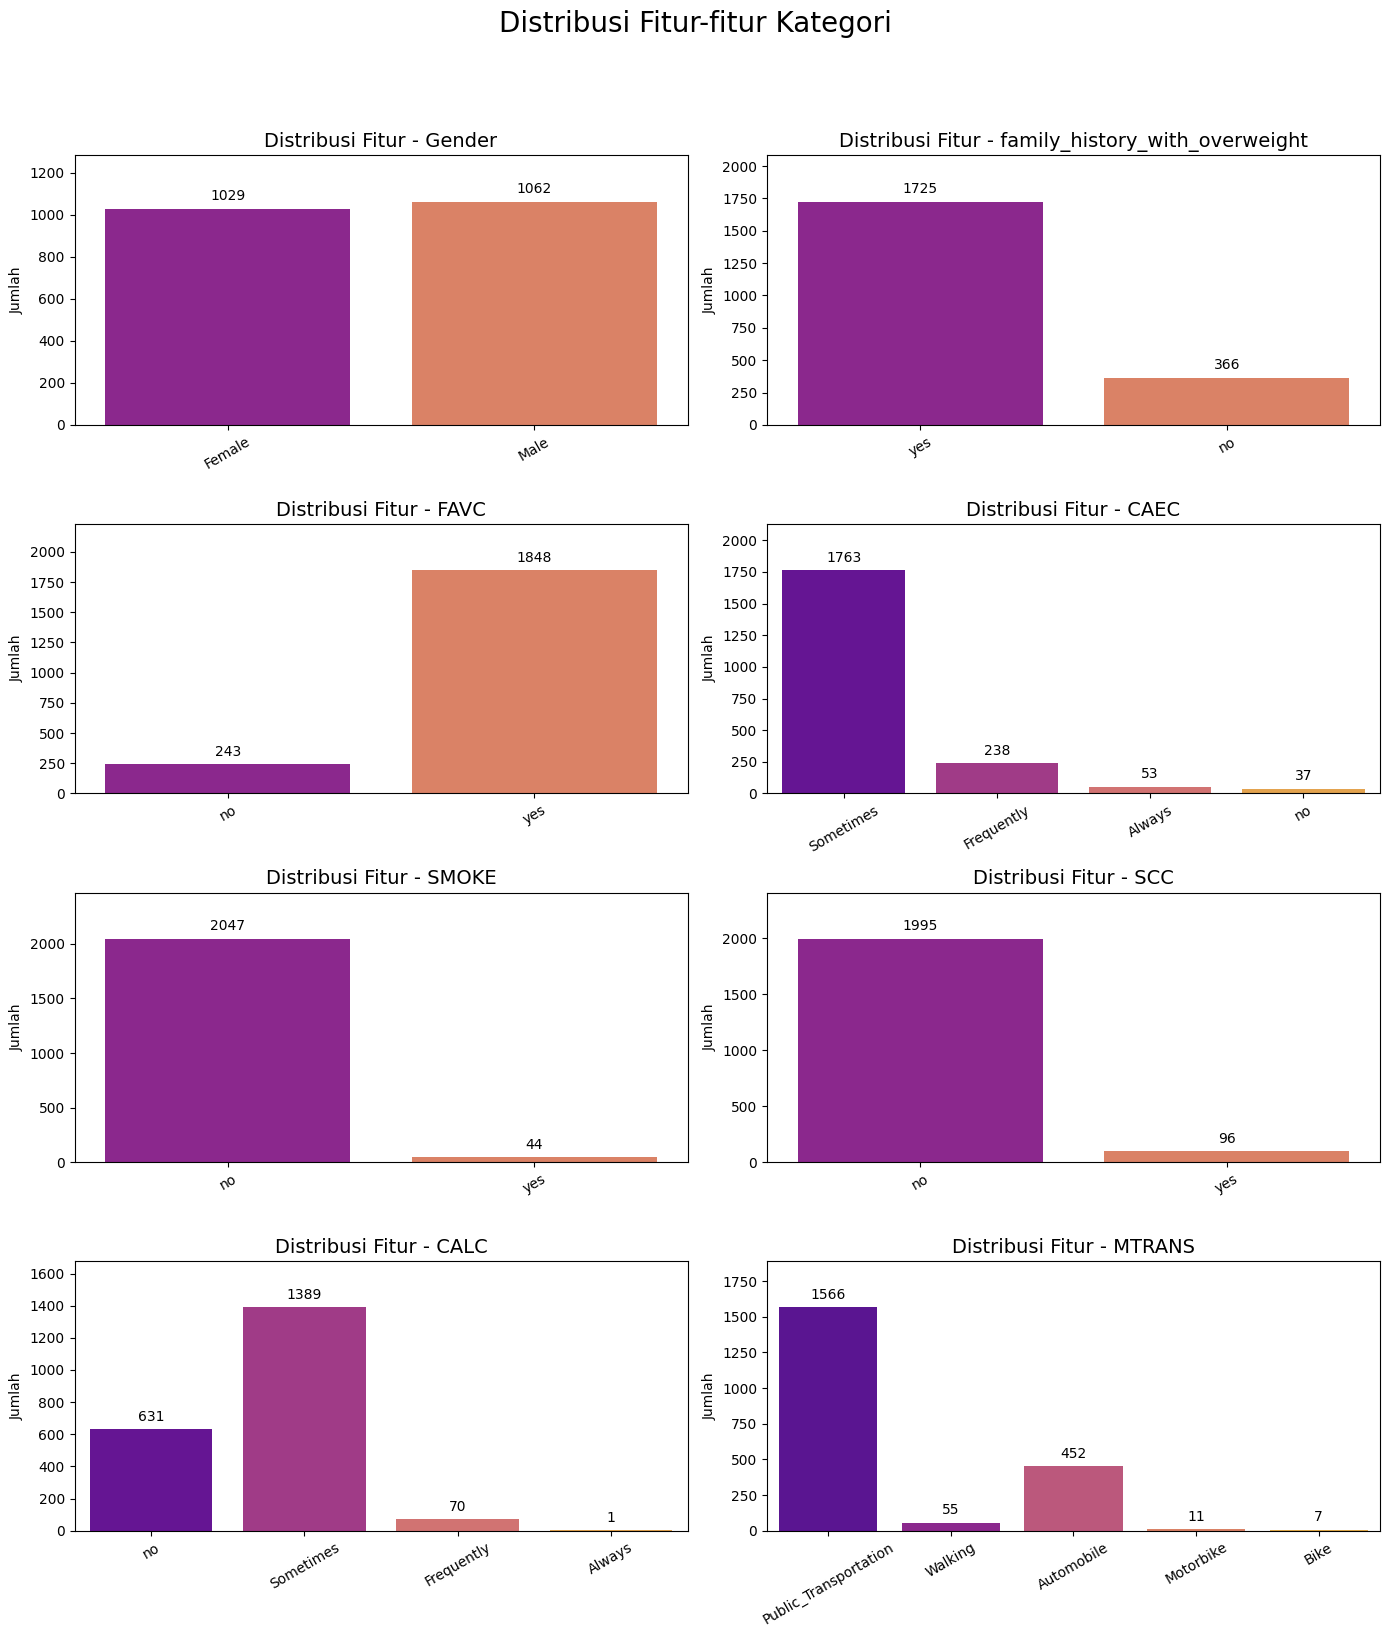

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diasumsikan 'df' adalah DataFrame Anda yang sudah dimuat
# df = pd.read_csv(...)

# 1. Visualisasi variabel target (NObeyesdad) dengan label di setiap bar
print("Distribusi Kelas Target (NObeyesdad)")
print(df['NObeyesdad'].value_counts())

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='NObeyesdad', palette='viridis')

# --- Metode Manual untuk Menambahkan Label di Setiap Bar ---
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),      # Teks labelnya (tinggi bar)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi xy
                ha = 'center', va = 'center',      # Penjajaran
                xytext = (0, 9),                   # Offset dari titik xy
                textcoords = 'offset points')

plt.title('Distribusi Kelas Target (Tingkat Obesitas)', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(top=plt.ylim()[1] * 1.15) # Menambah ruang ekstra di atas
plt.tight_layout()
plt.show()


# 2. Visualisasi untuk fitur kategori lainnya dengan label di setiap bar
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

plt.figure(figsize=(14, 16))

for i, col in enumerate(categorical_features, 1):
    ax = plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='plasma', ax=ax)

    # --- Metode Manual untuk Menambahkan Label di Setiap Bar (untuk subplot) ---
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    ax.set_title(f'Distribusi Fitur - {col}', fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=30)
    ax.set_ylim(top=ax.get_ylim()[1] * 1.15) # Menambah ruang ekstra di atas

plt.suptitle('Distribusi Fitur-fitur Kategori', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

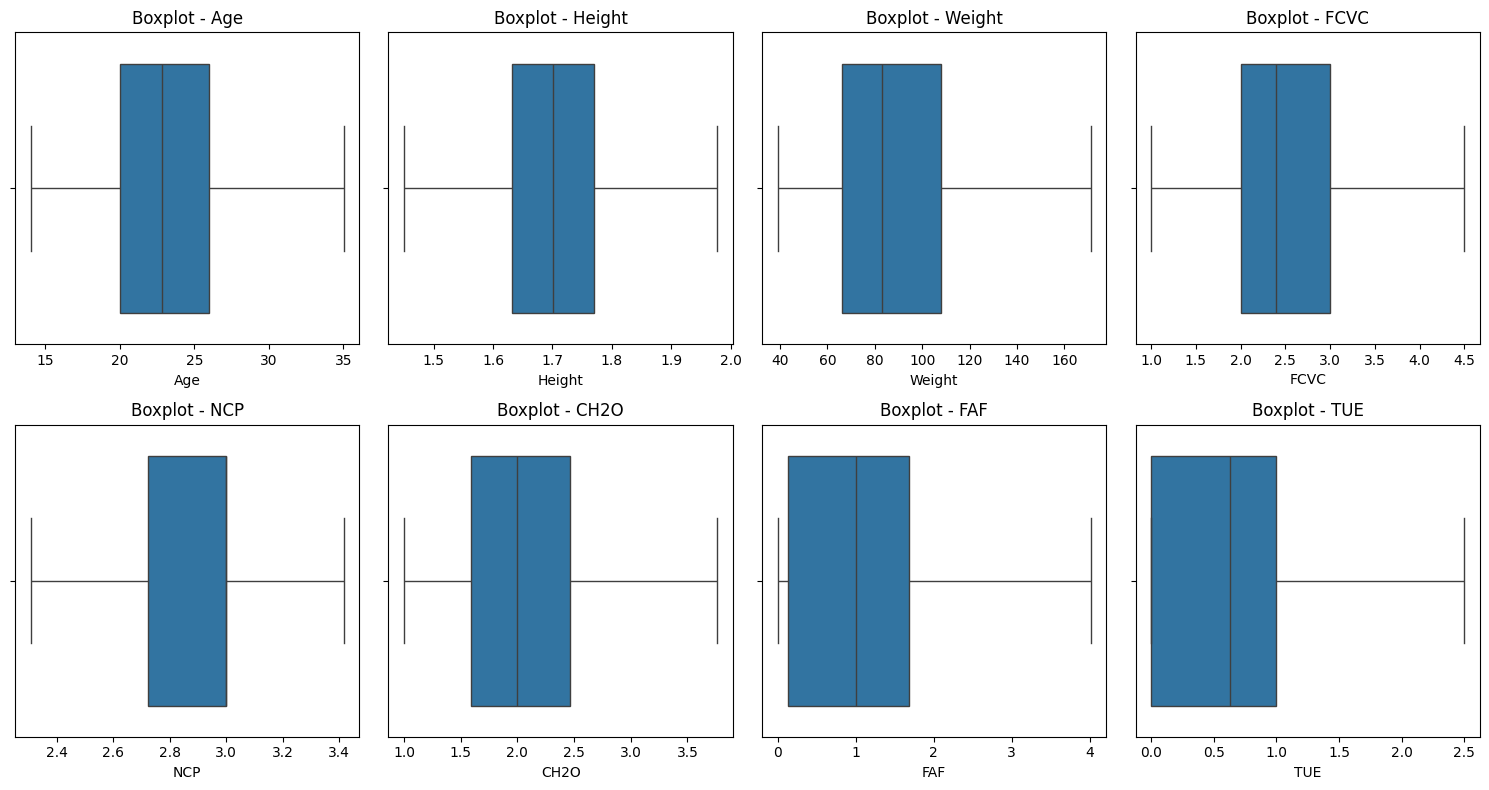

In [ ]:
# Tangani outlier (gunakan IQR method untuk kolom numerik)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Menampilkan boxplot setelah penanganan outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [ ]:
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2091 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2091 non-null   float64
 1   Gender                          2091 non-null   object 
 2   Height                          2091 non-null   float64
 3   Weight                          2091 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2091 non-null   object 
 6   FCVC                            2091 non-null   float64
 7   NCP                             2091 non-null   float64
 8   SCC                             2091 non-null   object 
 9   SMOKE                           2091 non-null   object 
 10  CH2O                            2091 non-null   float64
 11  family_history_with_overweight  2091 non-null   object 
 12  FAF           

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Encoding Fitur-Fitur Kategorikal (Bukan Target) ---

# Daftar fitur yang akan di-encode (tanpa target)
feature_columns = [
    'Gender',
    'CALC',
    'FAVC',
    'SCC',
    'SMOKE',
    'family_history_with_overweight', # Check this name carefully
    'CAEC',
    'MTRANS'
]

print("--- Memulai Proses Encoding untuk Fitur ---")

# --- Diagnostic Step: Print current column names ---
print("Current columns in DataFrame:", df.columns.tolist())
print("Features to encode:", feature_columns)
# -----------------------------------------------------


# Loop melalui setiap kolom fitur, encode, dan tampilkan hasilnya
for col in feature_columns:
    # Add a check before accessing the column
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

        print(f"\n========================================")
        print(f"✅ Hasil untuk fitur: '{col}'")
        print("========================================")

        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Peta Nilai Otomatis: {mapping}")

        print("\nValue Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):")
        print(df[col].value_counts().sort_index())
    else:
        print(f"\n❌ Kolom '{col}' tidak ditemukan dalam DataFrame. Lewati encoding untuk kolom ini.")

--- Memulai Proses Encoding untuk Fitur ---
Current columns in DataFrame: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']
Features to encode: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

✅ Hasil untuk fitur: 'Gender'
Peta Nilai Otomatis: {'Female': np.int64(0), 'Male': np.int64(1)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
Gender
0    1029
1    1062
Name: count, dtype: int64

✅ Hasil untuk fitur: 'CALC'
Peta Nilai Otomatis: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
CALC
0       1
1      70
2    1389
3     631
Name: count, dtype: int64

✅ Hasil untuk fitur: 'FAVC'
Peta Nilai Otomatis: {'no': np.int64(0), 'yes': np.int64(1)}

Value Counts (diurutkan berdasarkan nilai 0, 1, 2, ...):
FAVC
0 

In [ ]:
# Simpan dataframe yang telah dipreproses ke file CSV
 df.to_csv('obesity_preprocessed.csv', index=False)

<ipython-input-17-956326083>:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


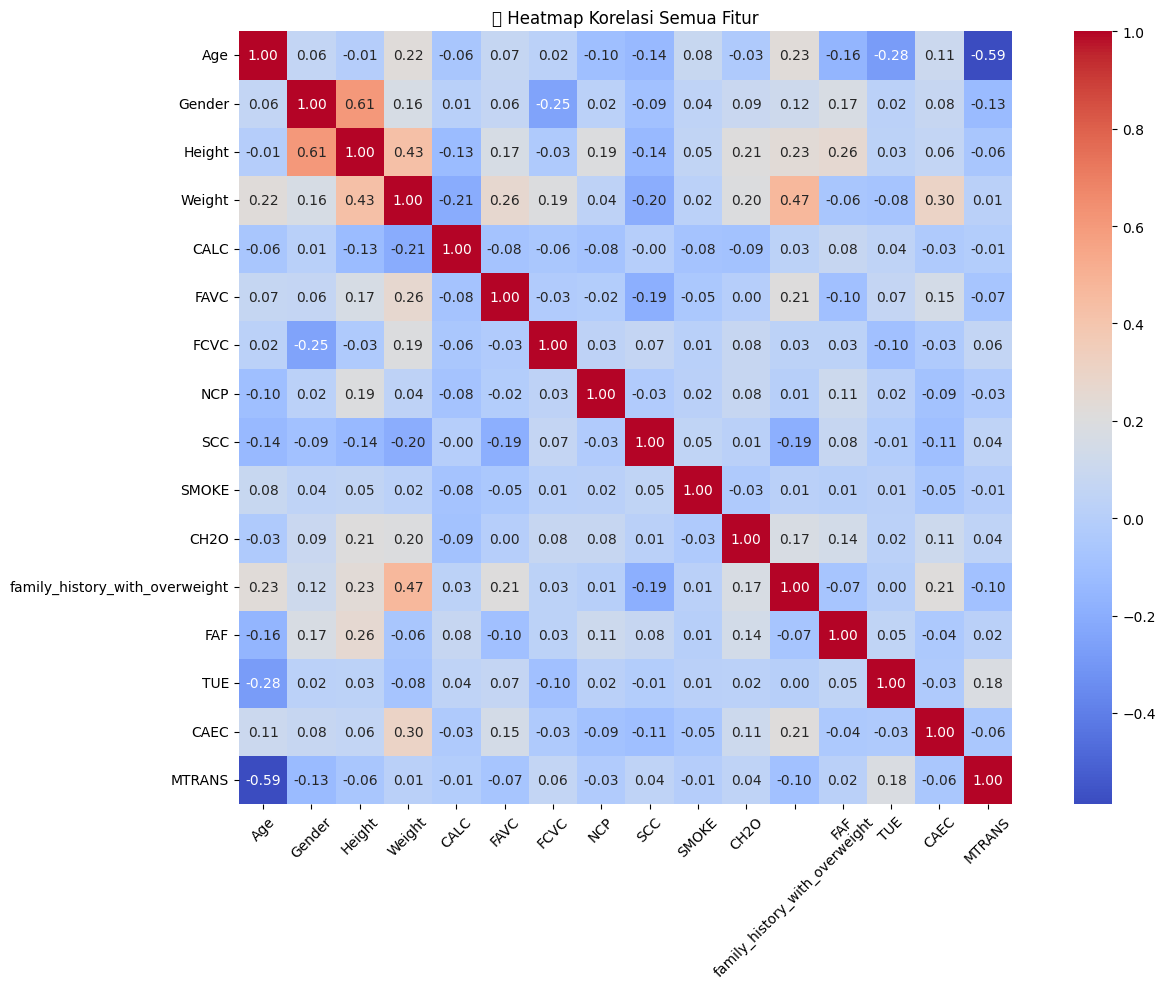

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.drop('NObeyesdad', axis=1)

# Hitung korelasi Pearson
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Heatmap Korelasi Semua Fitur")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

# Encode target label
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['NObeyesdad'])

# Pisahkan fitur
X_features = df.drop('NObeyesdad', axis=1)

Korelasi fitur dengan label berdasarkan ANOVA F-score:
                           Feature      F-score        p-value
3                           Weight  1172.911459   0.000000e+00
1                           Gender   152.933538  3.963203e-161
11  family_history_with_overweight   146.500016  2.688232e-155
6                             FCVC    98.284929  4.616745e-109
0                              Age    91.730815  2.102552e-102
14                            CAEC    77.825839   5.914431e-88
5                             FAVC    42.933237   1.215749e-49
7                              NCP    35.687010   2.650286e-41
2                           Height    35.425926   5.322810e-41
4                             CALC    33.158489   2.307606e-38
15                          MTRANS    26.969756   4.178366e-31
8                              SCC    22.579830   6.574214e-26
12                             FAF    17.821712   3.059061e-20
10                            CH2O    14.526551   2.641076e-16


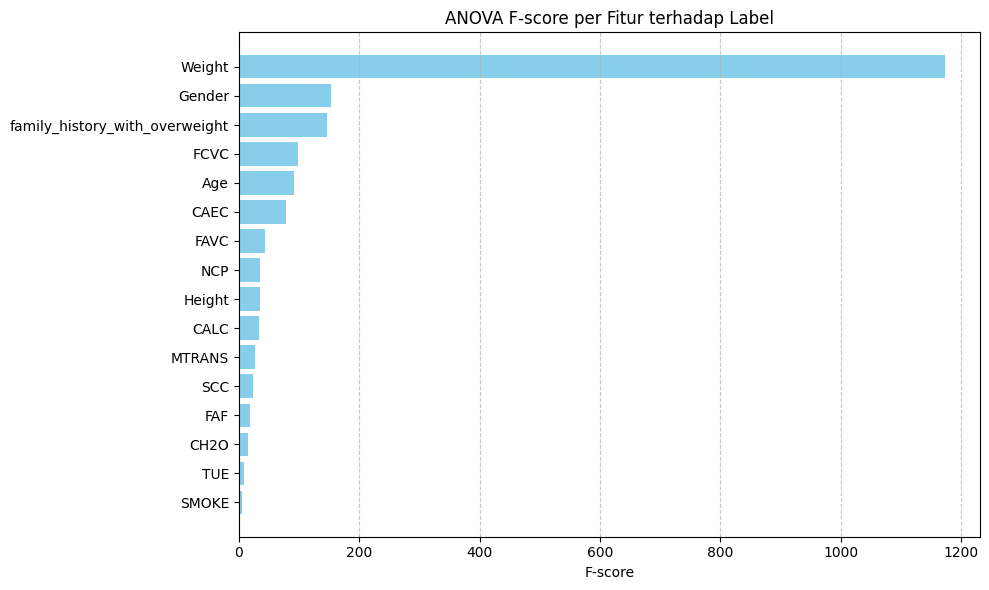

In [ ]:
# Hitung F-score ANOVA
f_scores, p_values = f_classif(X_features, y_encoded)

# Simpan ke DataFrame
anova_df = pd.DataFrame({
    'Feature': X_features.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

# Tampilkan tabel korelasi
print("Korelasi fitur dengan label berdasarkan ANOVA F-score:")
print(anova_df)

# Visualisasi dengan horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(anova_df['Feature'], anova_df['F-score'], color='skyblue')
plt.xlabel('F-score')
plt.title('ANOVA F-score per Fitur terhadap Label')
plt.gca().invert_yaxis()  # Fitur tertinggi di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X = df.drop('NObeyesdad', axis=1)
y = y_encoded  # hasil LabelEncoder

# Split train-test dengan stratifikasi label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

# Kolom numerik yang perlu di-scale
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()

# Fit-transform hanya pada data latih
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform pada data uji
X_test[num_cols] = scaler.transform(X_test[num_cols])


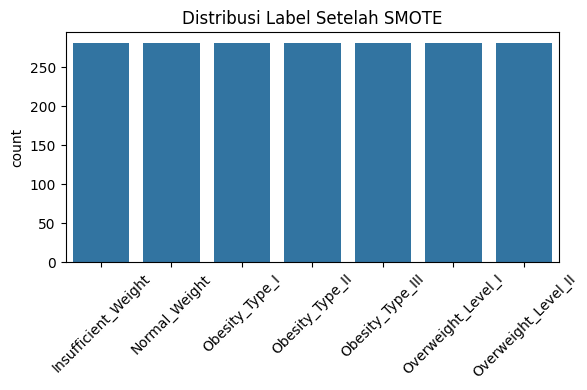

In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Terapkan SMOTE untuk balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Tambahkan kembali definisi mapping agar tidak NameError
mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))

# Visualisasi hasil balancing
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Distribusi Label Setelah SMOTE')
plt.xticks(ticks=range(len(mapping)), labels=le_target.classes_, rotation=45)
plt.tight_layout()
plt.show()

Training Decision Tree...
--> Akurasi Detail untuk Decision Tree: 0.9021 atau 90.21%
--> Waktu Training: 0.0444 detik
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.80      0.89      0.84        57
           2       0.88      0.87      0.88        70
           3       0.95      0.95      0.95        60
           4       0.98      0.98      0.98        65
           5       0.90      0.78      0.83        55
           6       0.89      0.86      0.88        58

    accuracy                           0.90       419
   macro avg       0.90      0.90      0.90       419
weighted avg       0.90      0.90      0.90       419



Training Random Forest...
--> Akurasi Detail untuk Random Forest: 0.9570 atau 95.70%
--> Waktu Training: 0.9030 detik
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:57:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--> Akurasi Detail untuk XGBoost: 0.9570 atau 95.70%
--> Waktu Training: 5.0806 detik
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.91      0.93      0.92        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.85      0.90        55
           6       0.93      0.97      0.95        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



Training SVM...
--> Akurasi Detail untuk SVM: 0.9021 atau 90.21%
--> Waktu Training: 0.2653 detik
Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.82      0.72      0

<ipython-input-23-3138239738>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-23-3138239738>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-23-3138239738>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
<ipython-input-23-3138239738>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

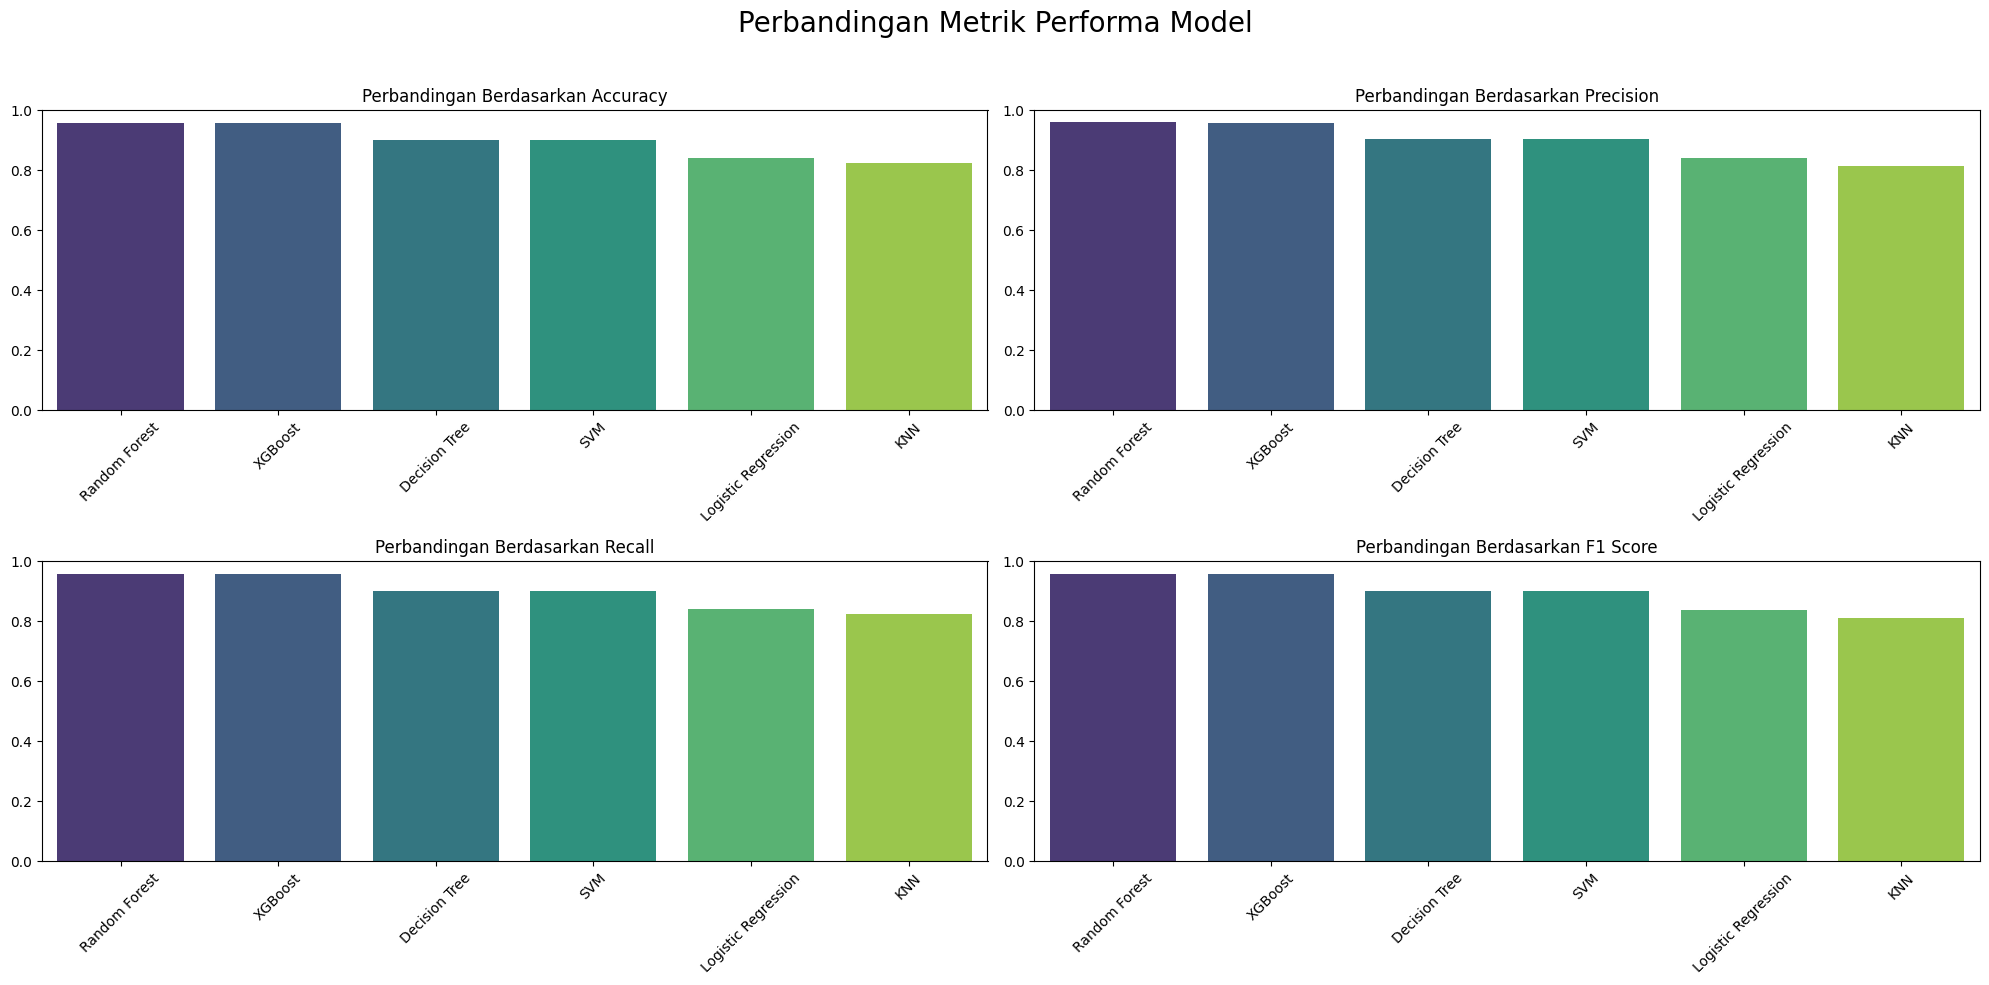

<ipython-input-23-3138239738>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by='Training Time (s)', ascending=True), x='Model', y='Training Time (s)', palette='plasma')


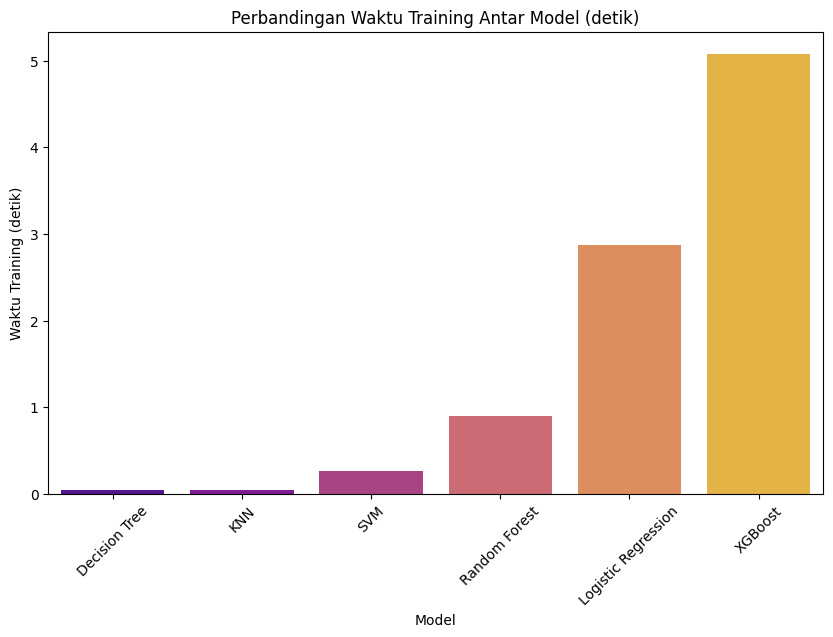

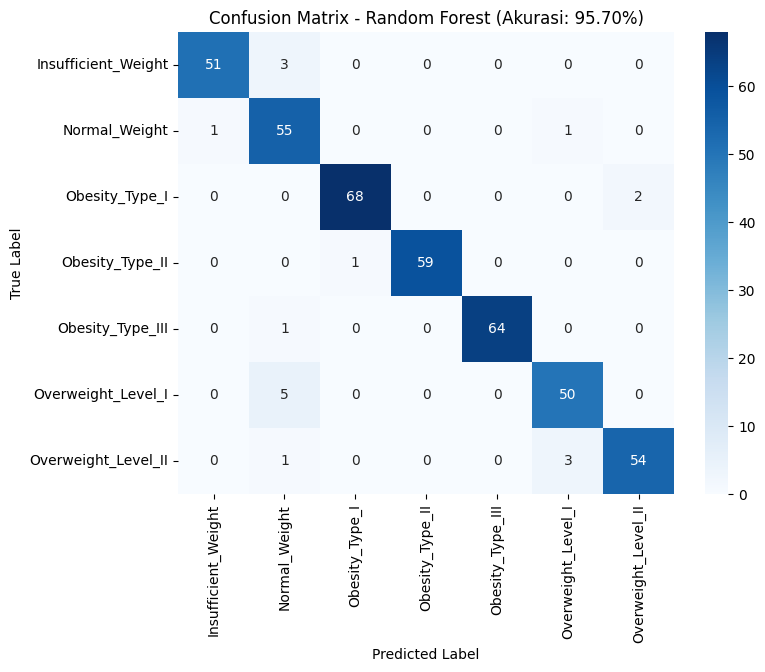

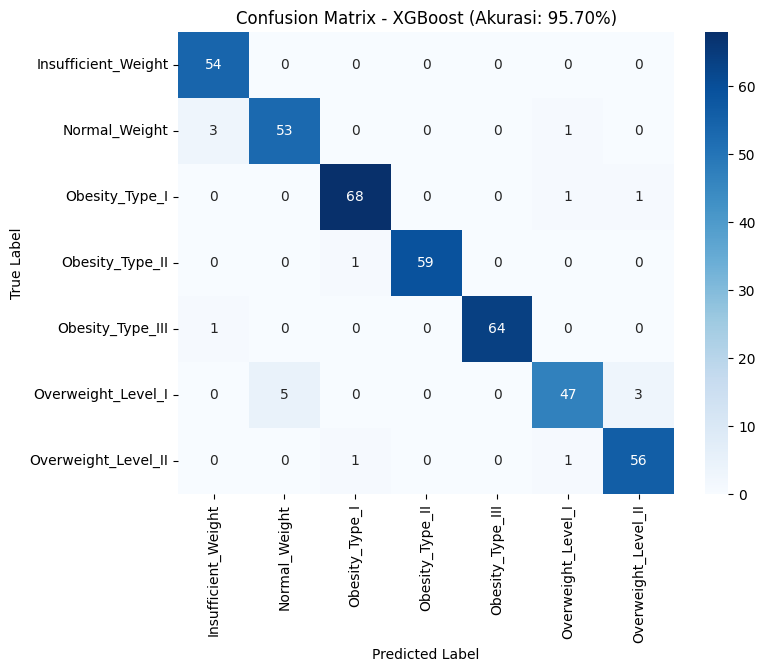

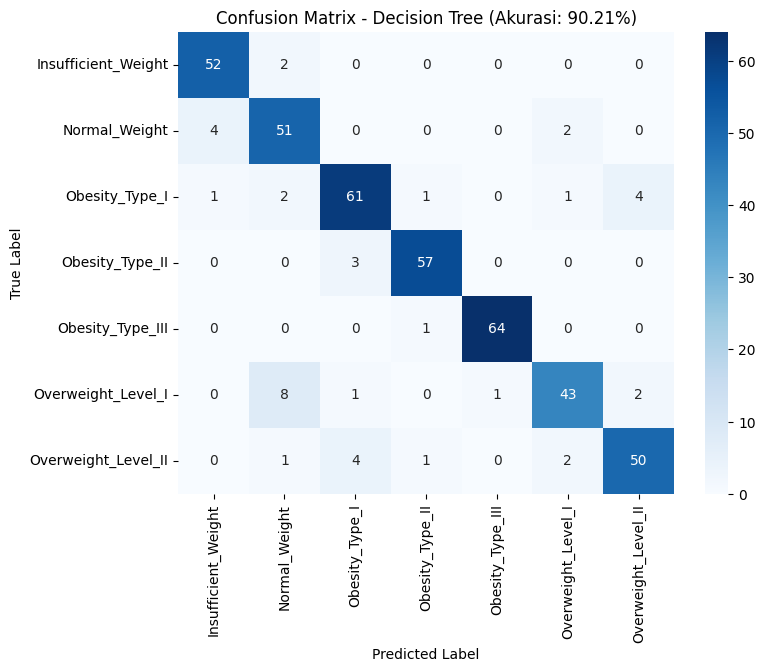

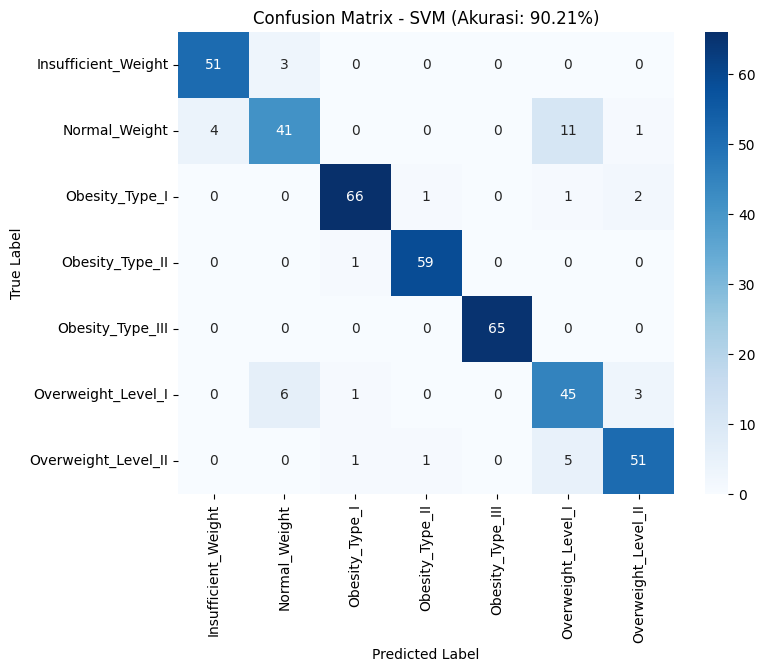

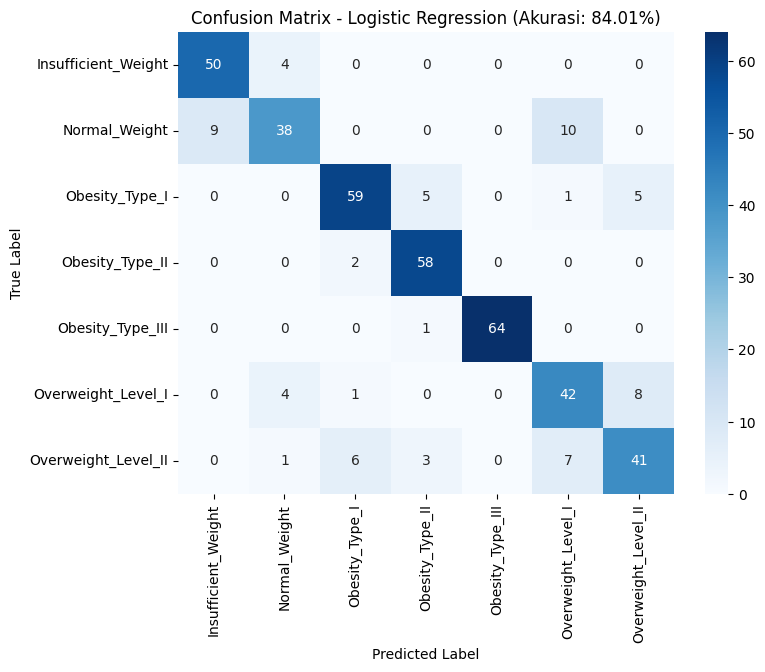

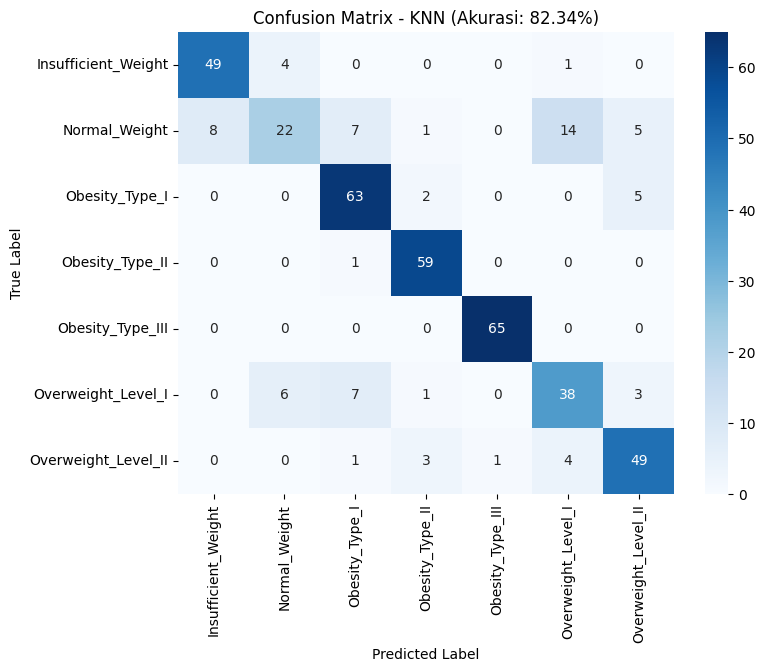

In [ ]:
# Diasumsikan semua library dan data sudah siap
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []
trained_models = {}

# Loop untuk setiap model
for name, model in models.items():
    print(f"Training {name}...")

    # Catat waktu mulai
    start_time = time.time()

    # Latih SEMUA model pada X_train dan y_train yang sudah diproses (scaled & SMOTE)
    model.fit(X_train, y_train)

    # Lakukan prediksi pada X_test yang sudah di-scaling
    y_pred = model.predict(X_test)

    # Catat waktu selesai dan hitung durasi
    end_time = time.time()
    training_time = end_time - start_time

    # Simpan model yang sudah dilatih
    trained_models[name] = model

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"--> Akurasi Detail untuk {name}: {acc:.4f} atau {acc:.2%}")
    print(f"--> Waktu Training: {training_time:.4f} detik")

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Training Time (s)': training_time,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    })

    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\n" + "="*60 + "\n")

# Buat DataFrame hasil
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Tampilkan DataFrame hasil dengan waktu training
print("Tabel Perbandingan Hasil Model:")
print(results_df.drop('Confusion Matrix', axis=1))


# --- Visualisasi (Kode visualisasi Anda diletakkan di sini dan tidak perlu diubah) ---

# Visualisasi perbandingan metrik performa model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(20, 10))
plt.suptitle('Perbandingan Metrik Performa Model', fontsize=20)
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=results_df, x='Model', y=metric, palette='viridis')
    plt.title(f'Perbandingan Berdasarkan {metric}')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualisasi khusus untuk waktu training
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.sort_values(by='Training Time (s)', ascending=True), x='Model', y='Training Time (s)', palette='plasma')
plt.title('Perbandingan Waktu Training Antar Model (detik)')
plt.xlabel('Model')
plt.ylabel('Waktu Training (detik)')
plt.xticks(rotation=45)
plt.show()


# Visualisasi confusion matrix
for index, row in results_df.iterrows():
    plt.figure(figsize=(8,6))
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {row['Model']} (Akurasi: {row['Accuracy']:.2%})")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# Setup parameter grid
param_grid = {
    'n_estimators': [150, 250, 350],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 6, 7],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model
xgb = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Hyperparameter tuning dengan RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("🔍 Memulai hyperparameter tuning...")
start = time.time()
search.fit(X_train, y_train)
end = time.time()
print(f"⏱️ Tuning selesai dalam {end - start:.2f} detik")
print("📌 Parameter terbaik:", search.best_params_)
print(f"📊 Skor akurasi cross-validation: {search.best_score_:.4f}")

# Evaluasi model terbaik
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n==============================")
print("✅ HASIL EVALUASI MODEL XGBOOST")
print("==============================")
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Uji: {accuracy:.4f} atau {accuracy:.2%}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


🔍 Memulai hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⏱️ Tuning selesai dalam 219.61 detik
📌 Parameter terbaik: {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
📊 Skor akurasi cross-validation: 0.9629

✅ HASIL EVALUASI MODEL XGBOOST
Akurasi pada Data Uji: 0.9570 atau 95.70%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.90      0.93      0.91        57
           2       0.97      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.92      0.87      0.90        55
           6       0.95      0.97      0.96        58

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419

